['Romania', 'Poland']


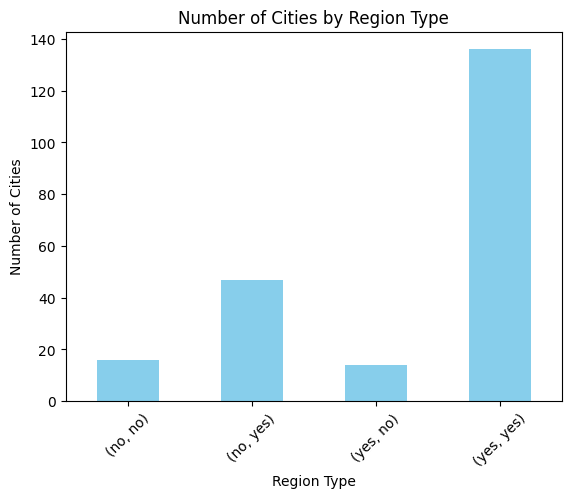

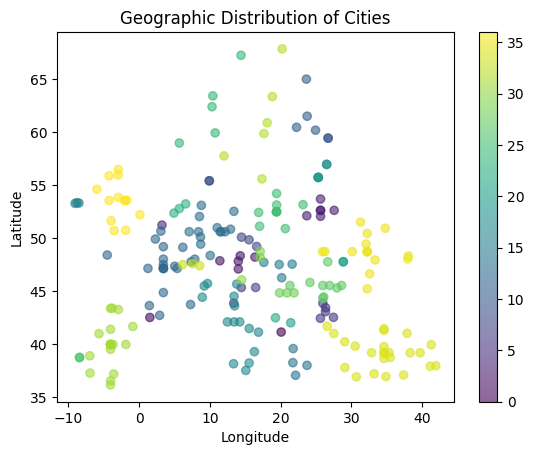

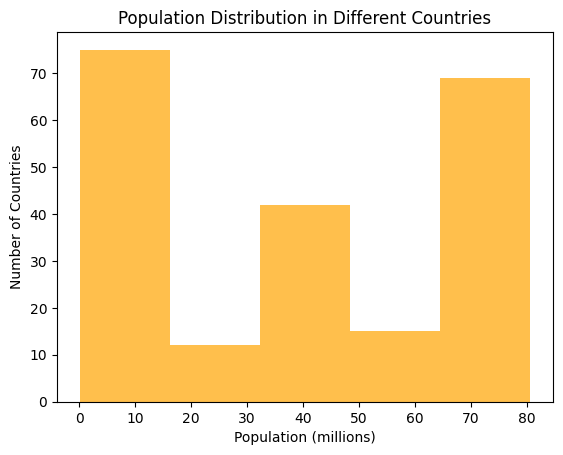

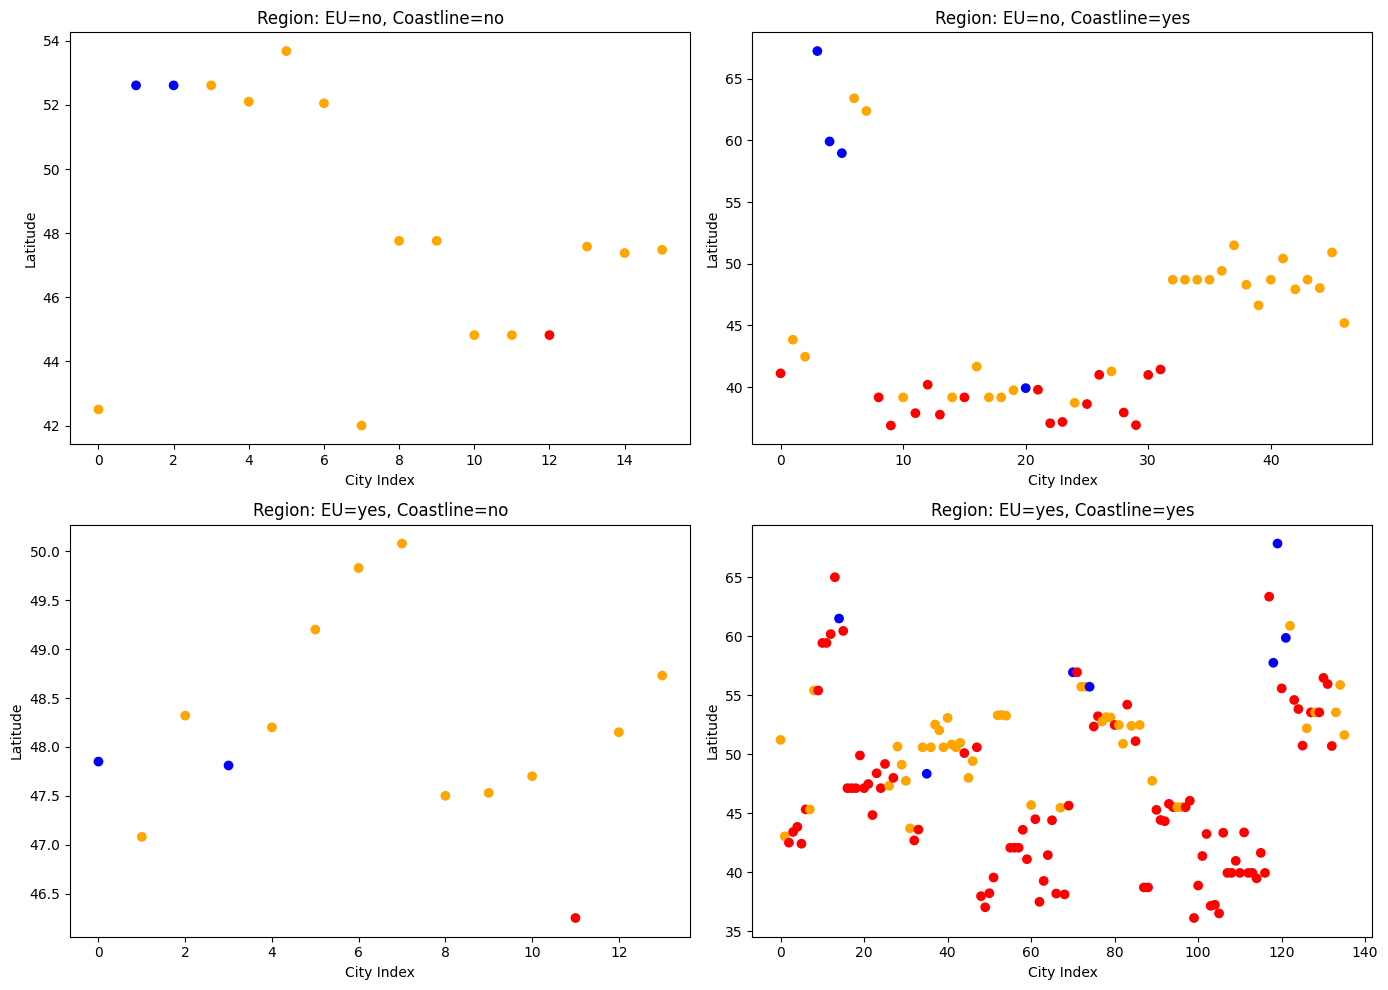

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('EuCitiesTemperatures.csv')
#Task1
country_means = df.groupby('country')[['latitude', 'longitude']].mean().round(2)

for country in country_means.index:
    df.loc[(df['country'] == country) & (df['latitude'].isna()), 'latitude'] = country_means.loc[country, 'latitude']
    df.loc[(df['country'] == country) & (df['longitude'].isna()), 'longitude'] = country_means.loc[country, 'longitude']

#task2
geo_band = df[(df['latitude'] >= 40) & (df['latitude'] <= 60) & (df['longitude'] >= 15) & (df['longitude'] <= 30)]
city_counts_per_country = geo_band['country'].value_counts()
max_city_count = city_counts_per_country.max()
countries_with_max_cities = city_counts_per_country[city_counts_per_country == max_city_count].index.tolist()
print(countries_with_max_cities)

# Task3
regions = df.groupby(['EU', 'coastline'])['temperature'].transform(lambda x: x.fillna(x.mean()))
df['temperature'] = df['temperature'].fillna(regions)
df.to_csv('Updated_EuCitiesTemperatures.csv', index=False)

# Visualization1
region_counts = df.groupby(['EU', 'coastline']).size()
region_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Region Type')
plt.ylabel('Number of Cities')
plt.title('Number of Cities by Region Type')
plt.xticks(rotation=45)
plt.show()

# Visualization2
colors = pd.factorize(df['country'])[0]
plt.scatter(df['longitude'], df['latitude'], c=colors, cmap='viridis', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Cities')
plt.colorbar()
plt.show()

# Visualization3
df['population'].plot(kind='hist', bins=5, alpha=0.7, color='orange')
plt.xlabel('Population (millions)')
plt.ylabel('Number of Countries')
plt.title('Population Distribution in Different Countries')
plt.show()

# Visualization4
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
for i, ((eu, coast), group) in enumerate(df.groupby(['EU', 'coastline'])):
    ax = axes[i // 2, i % 2]
    colors = ['red' if t > 10 else 'blue' if t < 6 else 'orange' for t in group['temperature']]
    ax.scatter(range(len(group)), group['latitude'], c=colors)
    ax.set_title(f'Region: EU={eu}, Coastline={coast}')
    ax.set_xlabel('City Index')
    ax.set_ylabel('Latitude')
plt.tight_layout()
plt.show()